In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_diabetes
# from sklearn.inspection import DecisionBoundaryDisplay
from scipy.stats import multivariate_normal
from matplotlib import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
T = np.loadtxt('delitos/delitos_train_data.csv', delimiter=',')
y_t = np.loadtxt('delitos/delitos_train_label.csv', delimiter=',')

In [3]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Cargar los datos de entrenamiento y etiquetas
T = np.loadtxt('delitos/delitos_train_data.csv', delimiter=',')
y_t = np.loadtxt('delitos/delitos_train_label.csv', delimiter=',')

# Crear un clasificador de árbol de decisión con entropía como criterio
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(T, y_t)

# La función de corte en el nodo raíz se puede obtener de la siguiente manera
root_feature_index = clf.tree_.feature[0]

print("La función de corte en el nodo raíz se encuentra en la característica con índice:", root_feature_index)


La función de corte en el nodo raíz se encuentra en la característica con índice: 349


In [4]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Imprimir el árbol en forma de texto sin nombres de características
tree_text = export_text(clf, feature_names=None)
print(tree_text)


|--- feature_349 <= -0.00
|   |--- class: 0.0
|--- feature_349 >  -0.00
|   |--- feature_855 <= -0.02
|   |   |--- feature_207 <= -0.01
|   |   |   |--- class: 0.0
|   |   |--- feature_207 >  -0.01
|   |   |   |--- class: 1.0
|   |--- feature_855 >  -0.02
|   |   |--- class: 1.0



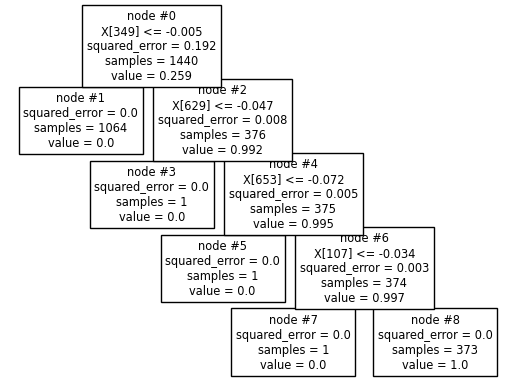

In [5]:
arbol = tree.DecisionTreeRegressor()
arbol.fit(T, y_t)
_ = tree.plot_tree(arbol, node_ids=True)

# 3

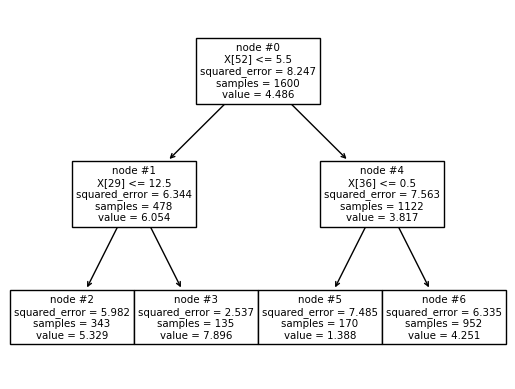

In [6]:
from sklearn import datasets
digits = datasets.load_digits()
main_data = digits['data']
targets = digits['target']
arbol = tree.DecisionTreeRegressor(max_depth=2).fit(main_data[:1600] , targets[:1600])
_ = tree.plot_tree(arbol, node_ids=True)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

depths = [2, 4, 6]
results = {}

X_train, X_test, y_train, y_test = train_test_split(main_data, targets, test_size=0.2, random_state=42)

for depth in depths:

    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular el rendimiento macro-recall
    macro_recall = recall_score(y_test, y_pred, average='macro')

    # Almacenar el resultado en el diccionario
    results[f'Depth_{depth}'] = macro_recall

# Los resultados se encuentran en el diccionario 'results'


In [8]:
results

{'Depth_2': 0.30975362872421697,
 'Depth_4': 0.5639318776034508,
 'Depth_6': 0.7673569876188638}